## Mohammed El Mouden
## Master 2AI: Introduction to AI
## Project: Wine Quality Prediction with Linear Regression , KNeighborsClassifier , Decision Tree Model and SVC .

In this notebook, I conducted exploratory data analysis on the dataset using Matplotlib and Seaborn. Following that, I employed various classifier models to predict the quality of the wine.

1. Decision Tree Model
2. Linear Regression 
3. SVC
4. Grid Search CV
5. Cross Validation Score

## Étapes du Projet :

1- Collecte des données : Télécharger l'ensemble de données sur la qualité du vin à partir de
Kaggle ou d'un autre site de données.

URL : https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009

In [27]:
import pandas as pd


csv_file = 'winequality-red.csv'

wine_data = pd.read_csv(csv_file)

# Display the first few rows of the DataFrame
wine_data.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [2]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [3]:
wine_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [4]:
set(wine_data['quality'])

{3, 4, 5, 6, 7, 8}

## 2- Prétraitement des données : 

Effectuer le nettoyage des données en supprimant les valeurs
manquantes, en normalisant les caractéristiques si nécessaire, et en convertissant les variables
catégoriques en variables numériques si nécessaire.

missing values in your DataFrame using the isna()

In [5]:
wine_data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

the output of print(missing_values) is all zeros, it means that there are no missing values in any column of your wine dataset. 

In [6]:
means = wine_data.mean()
std_devs = wine_data.std()

# Print the mean and standard deviation of each feature
print("Mean of each feature:")
print(means)
print("\nStandard deviation of each feature:")
print(std_devs)

Mean of each feature:
fixed acidity            8.319637
volatile acidity         0.527821
citric acid              0.270976
residual sugar           2.538806
chlorides                0.087467
free sulfur dioxide     15.874922
total sulfur dioxide    46.467792
density                  0.996747
pH                       3.311113
sulphates                0.658149
alcohol                 10.422983
quality                  5.636023
dtype: float64

Standard deviation of each feature:
fixed acidity            1.741096
volatile acidity         0.179060
citric acid              0.194801
residual sugar           1.409928
chlorides                0.047065
free sulfur dioxide     10.460157
total sulfur dioxide    32.895324
density                  0.001887
pH                       0.154386
sulphates                0.169507
alcohol                  1.065668
quality                  0.807569
dtype: float64


Human wine preferences scores varied from 3 to 8, so it’s straightforward to categorize answers into ‘bad’ or ‘good’ quality of wines .



In [7]:
#Making binary classificaion for the response variable.
#Dividing wine as good and bad by giving the limit for the quality
from sklearn.calibration import LabelEncoder


bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wine_data['quality'] = pd.cut(wine_data['quality'], bins = bins, labels = group_names)
label_quality = LabelEncoder()
#Bad becomes 0 and good becomes 1 

wine_data['quality'] = label_quality.fit_transform(wine_data['quality'])
wine_data['quality'].value_counts()

quality
0    1382
1     217
Name: count, dtype: int64

## 3. Division des données : 
Diviser l'ensemble de données en ensembles d'entraînement et de test
pour évaluer les performances des modèles.

Before data investigation you should have been done with one of the most important steps is data splitting. 

The data has been split into two groups: training set 80%, test set 20%. 

In [8]:
from sklearn.model_selection import train_test_split

X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=42)

In [9]:
# Applying Standard scaling to get optimized result
from sklearn.discriminant_analysis import StandardScaler


sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       273
           1       0.69      0.43      0.53        47

    accuracy                           0.89       320
   macro avg       0.80      0.70      0.73       320
weighted avg       0.88      0.89      0.88       320



In [11]:
# Statistical characteristics of each numerical feature
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,0.135710
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.342587
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,0.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,0.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


Using the following plots we may understand data distribution for separate attributes; for example, data distribution for attribute “alcohol” is positively skewed, for attribute “density” data quite normally distributed. 

Take attention to the wine quality data distribution.

It’s a bimodal distribution and there are more wines with average quality than wines with ‘good’ or ‘bad’ quality.

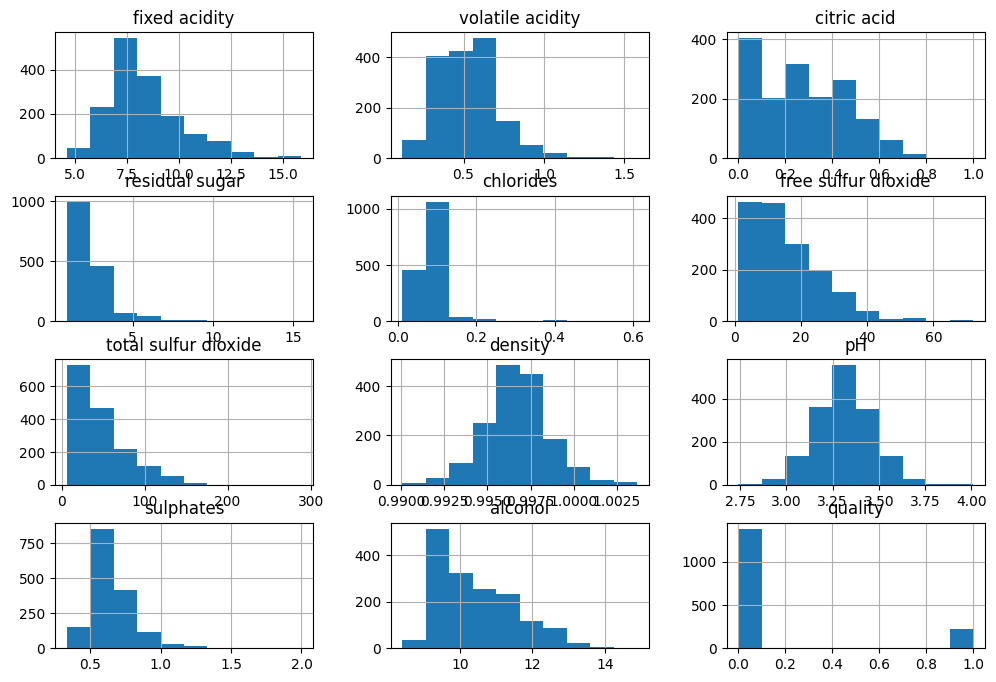

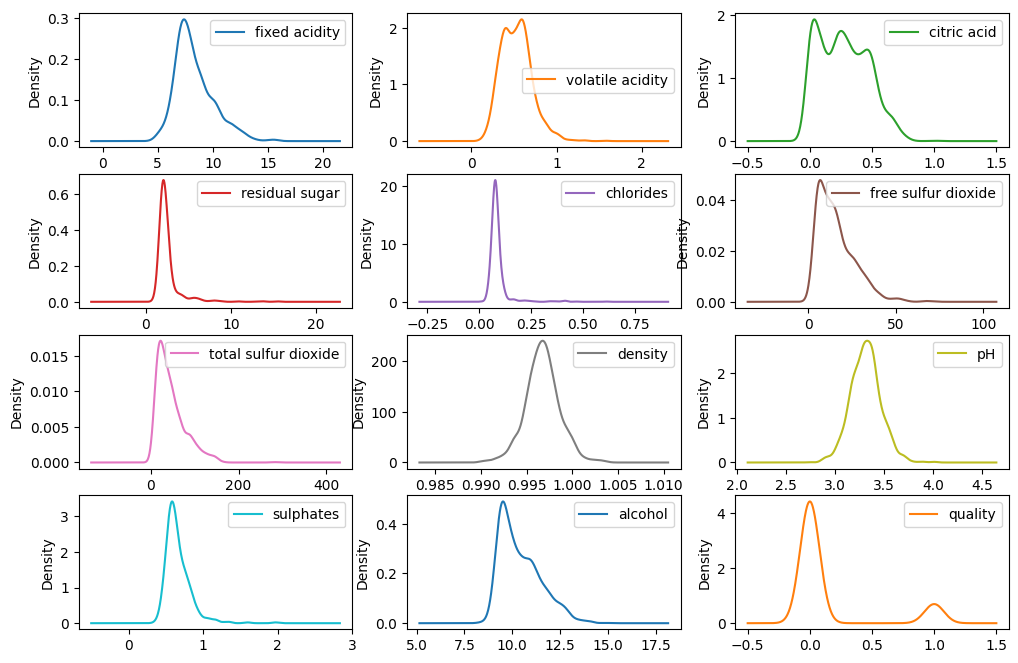

In [13]:
wine_data.hist(bins=10, figsize=(12, 8))  # Adjust figsize as needed
plt.show()

# Density
wine_data.plot(kind='density', subplots=True, layout=(4, 3), sharex=False, figsize=(12, 8))  # Adjust figsize as needed
plt.show()

Visualizing the graph of the number of values for each category bads and goods wines , we could see that there are far many bad answers than good ones.

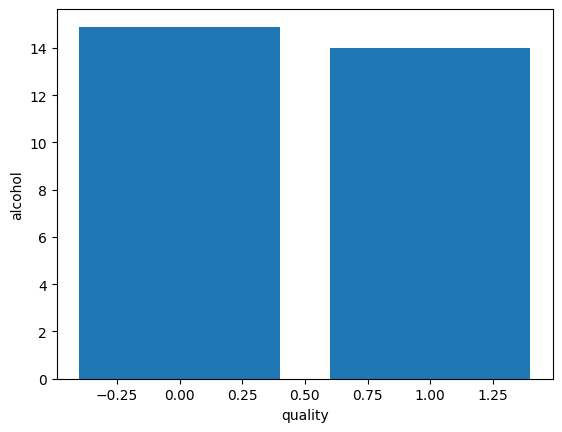

In [ ]:
from matplotlib import pyplot as plt


plt.bar(wine_data['quality'], wine_data['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

quality
0    1382
1     217
Name: count, dtype: int64


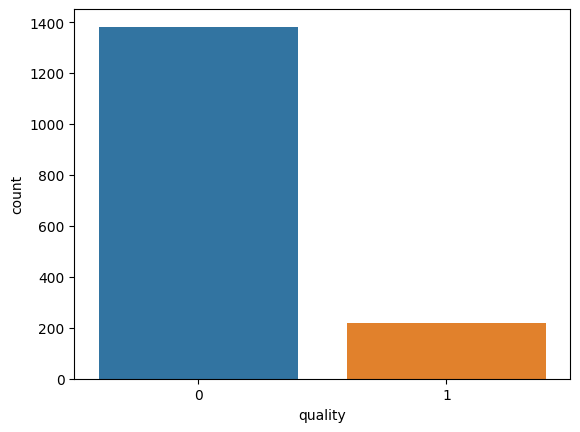

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


print(wine_data['quality'].value_counts())


sns.countplot(data=wine_data, x='quality')
plt.show()

## 4. Entraînement des modèles : 

Entraîner un modèle de régression linéaire et un modèle d'arbres
de décision sur l'ensemble d'entraînement.

Evaluating a Machine Learning model can be quite tricky. 

Usually model evaluated performance based on an error metric.

 Nevertheless, this method is not very reliable as the accuracy obtained for one test set can be very different to the accuracy obtained for a different test set.

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []

models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
models.append(('KNeighborsClassifier', KNeighborsClassifier()))
models.append(('LogisticRegression', LogisticRegression()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
   kfold = KFold(n_splits=10, random_state=seed ,shuffle=True)
   cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
   results.append(cv_results)
   names.append(name)
   msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
   print(msg)
   


DecisionTreeClassifier: 0.869433 (0.023429)
KNeighborsClassifier: 0.876458 (0.019443)
LogisticRegression: 0.879583 (0.024809)


## 5. Évaluation des modèles : 

Évaluer les performances des modèles en utilisant des métriques
telles que l'erreur quadratique moyenne (RMSE) pour la régression et l'exactitude pour la
classification. Comparer les performances des deux modèles.

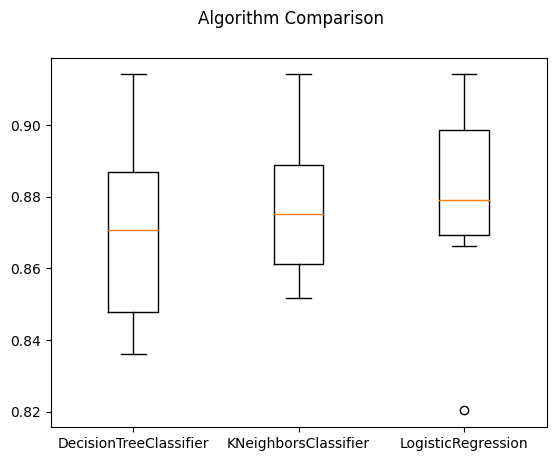

In [29]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

def svc_param_selection(X, y, nfolds):
    # Define parameter grid
    param_grid = {
        'C': [0.1, 1, 10],            # Narrowed down range for C
        'kernel': ['linear', 'rbf'],
        'gamma': [0.1, 1, 10]         # Narrowed down range for gamma
    }
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    svc = SVC(max_iter=10000)  # Increased max_iter
    
    grid_search = GridSearchCV(svc, param_grid=param_grid, scoring='accuracy', cv=nfolds, verbose=1)
    grid_search.fit(X_scaled, y)

    return grid_search.best_params_

# Example usage
best_params = svc_param_selection(X_train, y_train, nfolds=5)
print("Best parameters:", best_params)


Fitting 5 folds for each of 18 candidates, totalling 90 fits


c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Best parameters: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}


In [23]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score



svc = SVC(C = 1, gamma =  1, kernel= 'rbf')
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)
print('Confusion matrix')
print(confusion_matrix(y_test, pred_svc))
print('Classification report')
print(classification_report(y_test, pred_svc))
print('Accuracy score',accuracy_score(y_test, pred_svc))

Confusion matrix
[[271   2]
 [ 35  12]]
Classification report
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       273
           1       0.86      0.26      0.39        47

    accuracy                           0.88       320
   macro avg       0.87      0.62      0.66       320
weighted avg       0.88      0.88      0.86       320

Accuracy score 0.884375


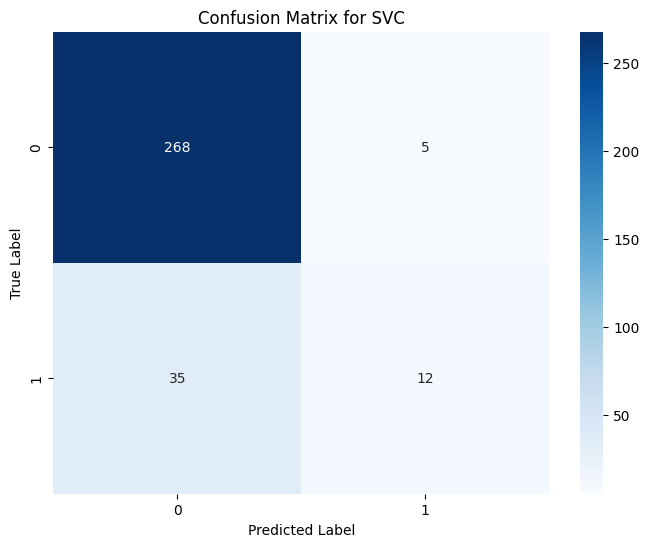

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plot for Regression Linéaire
def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix', cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)
    plt.show()

# Plot Confusion Matrix for SVC
plot_confusion_matrix(y_test, pred_svc, title='Confusion Matrix for SVC')


In [24]:
from sklearn.ensemble import AdaBoostClassifier


ada_classifier = AdaBoostClassifier(n_estimators=100)
ada_classifier.fit(X_train, y_train)
pred_ada = ada_classifier.predict(X_test)

# Cross-validation
scores = cross_val_score(ada_classifier,X_test,y_test, cv=5)
print('Accuracy score',scores.mean())

Accuracy score 0.84375


## 6. Analyse comparative : 

Analyser les résultats obtenus et discuter des avantages et des
inconvénients de chaque algorithme en termes de précision, de vitesse d'exécution et de
capacité à généraliser sur de nouvelles données.

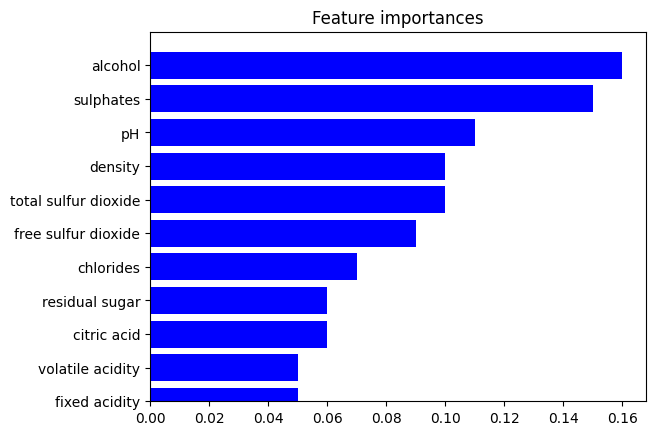

In [26]:
import numpy as np


colum_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

importance=ada_classifier.feature_importances_

std = np.std([tree.feature_importances_ for tree in ada_classifier.estimators_],
             axis=0)
indices = np.argsort(importance)

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.barh(range(X.shape[1]), importance[indices],
       color="b",  align="center")

plt.yticks(range(X.shape[1]), colum_names)
plt.ylim([0, X.shape[1]])
plt.show()

# Conclusion: 

Our analysis revealed that our dataset is clean and representative, allowing us to categorize wine quality into 'bad' or 'good' categories.

By exploring the data, we found correlations between features like 'alcohol' and 'quality of wine', indicating their importance in determining wine quality.

Machine Learning Algorithms highlighted the significance of features such as 'alcohol', 'sulphates', and 'pH' in predicting wine scores. 

Fine-tuning the Support Vector Classifier using Grid Search CV led to an impressive accuracy score of 84%, emphasizing the importance of feature selection and algorithm optimization.

In conclusion, our findings underscore the value of understanding wine physicochemical properties to enhance quality and cater to consumer preferences, thereby improving market competitiveness and profitability.

